In [1]:
import boto3
import configparser
s3client = boto3.client('s3')
# s3 = boto3.resource('s3')

# Read the config file
config = configparser.ConfigParser()
config.read('../aws_S3_full_access.cfg')

# Loading The Data:
s3 = boto3.resource(
    service_name='s3',
    region_name='us-east-1',
    aws_access_key_id=config['AWS']['KEY'],
    aws_secret_access_key=config['AWS']['SECRET'])



my_bucket="aws-sagemaker-image-segmentation-rotten-apple"
orig_file="data/"
dest_file="Model/"
my_file="data/1/1.jpg"


# response = s3.get_object(Bucket=my_bucket, Key=my_file)
# body = response['Body']
# body.read()

['aws-sagemaker-image-segmentation-rotten-apple/data/1', 'aws-sagemaker-image-segmentation-rotten-apple/data/11', 'aws-sagemaker-image-segmentation-rotten-apple/data/12', 'aws-sagemaker-image-segmentation-rotten-apple/data/13', 'aws-sagemaker-image-segmentation-rotten-apple/data/14', 'aws-sagemaker-image-segmentation-rotten-apple/data/15', 'aws-sagemaker-image-segmentation-rotten-apple/data/16', 'aws-sagemaker-image-segmentation-rotten-apple/data/17', 'aws-sagemaker-image-segmentation-rotten-apple/data/18', 'aws-sagemaker-image-segmentation-rotten-apple/data/19', 'aws-sagemaker-image-segmentation-rotten-apple/data/2', 'aws-sagemaker-image-segmentation-rotten-apple/data/20', 'aws-sagemaker-image-segmentation-rotten-apple/data/21', 'aws-sagemaker-image-segmentation-rotten-apple/data/22', 'aws-sagemaker-image-segmentation-rotten-apple/data/23', 'aws-sagemaker-image-segmentation-rotten-apple/data/24', 'aws-sagemaker-image-segmentation-rotten-apple/data/25', 'aws-sagemaker-image-segmentatio

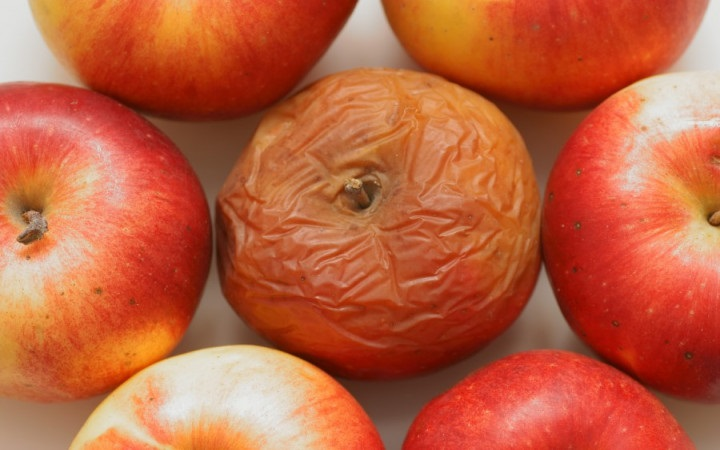

In [2]:
from PIL import Image
import s3fs

fs = s3fs.S3FileSystem(key=config['AWS']['KEY'],
    secret=config['AWS']['SECRET'])

# To List 5 files in your accessible bucket
print(fs.ls('s3://aws-sagemaker-image-segmentation-rotten-apple/data/'))

# open it directly
f = fs.open('s3://aws-sagemaker-image-segmentation-rotten-apple/data/1/1.jpg')
display(Image.open(f))

# for p in fs.ls('s3://appledatabucket/Apple/'):
#     print(p.split("/")[2])

In [7]:
!pygmentize ImageSegmentation.py

# Importing Packages :
import os
import sys
import boto3
import subprocess


# Installing all the Pack Required :
subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "pip"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "tifffile"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "patchify"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "h5py==2.10.0"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "segmentation-models==1.0.1"])


# Importing nessary packages:
import io
import argparse
import tensorflow
import numpy as np
from numpy import asarray
from tensorflow import keras
from patchify import patchify
import segmentation_models as sm
from matplotlib import pyplot as plt
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import configparser

# The training code will be cont

In [8]:
# Defining the Execution Role so that we could start Training :

from sagemaker import get_execution_role
role = get_execution_role()
role

'arn:aws:iam::516003265142:role/service-role/AmazonSageMaker-ExecutionRole-20220727T095620'

In [9]:
#Defining the Tensorflow Estimator For Training:

from sagemaker.tensorflow import TensorFlow

tf_estimator = TensorFlow(entry_point='ImageSegmentation.py',         # Python source file which should be executed as the entry point to model hosting.
                          role=role,                           # An AWS IAM role (either name or full ARN).
                          train_instance_count=1,              # Number of EC2 instances to use.
                          train_instance_type='ml.m4.xlarge',# Type of EC2 instance to use.
                          framework_version='1.15',            # TensorFlow version you want to use for executing your model training code.
                          py_version='py36',                   # Python version you want to use for executing your model training code.          
                          script_mode=True,                    # Script Mode Enable to create Docker File Automaticaly.
                         )

train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [ ]:
# Training the Model in the Sagemaker Instance:

tf_estimator.fit()

2022-08-04 07:06:31 Starting - Starting the training job...ProfilerReport-1659596791: InProgress
...
2022-08-04 07:07:16 Starting - Preparing the instances for training.........
2022-08-04 07:08:55 Downloading - Downloading input data...
2022-08-04 07:09:28 Training - Downloading the training image...

In [ ]:
# Customising The End Point so that it can be easily accessed:

import time
py_torch_endpoint = 'FruitImageSegmentation-' + time.strftime("%Y-%m-%d-%H-%M-%S", time.gmtime())

In [ ]:
# Deployment of the Trained Model :
# This will creating an endpoint which is a fully managed service that allows you to make real-time inferences

predictor = tf_estimator.deploy(initial_instance_count=1,
                                     instance_type='ml.t2.medium',
                                     endpoint_name = py_torch_endpoint)

In [ ]:
predictor.delete_endpoint()